In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Function to plot a confusion matrix

In [6]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

In [8]:
data = pd.read_csv("C:\\Users\\SHAARIF ANAS\\Desktop\\github\\SpaceX launch prediction\\DataSets\\SpaceX_2.csv")
X = pd.read_csv("C:\\Users\\SHAARIF ANAS\\Desktop\\github\\SpaceX launch prediction\\DataSets\\SpaceX_3.csv")

In [9]:
Y = data['Class'].to_numpy()

In [10]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [12]:
Y_test.shape

(34,)

### Logistic Regression

In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9043956043956044


In [16]:
best_logreg = logreg_cv.best_estimator_
best_logreg.score(X_test, Y_test)

0.9705882352941176

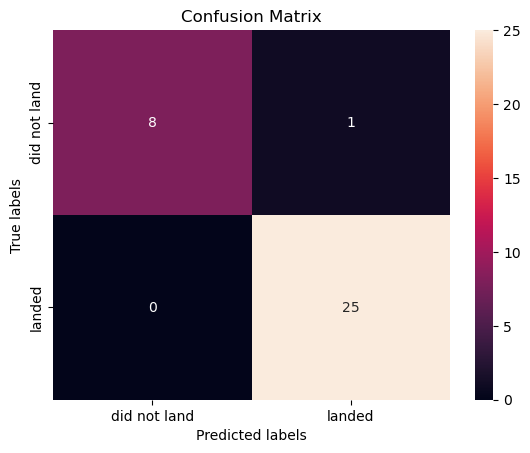

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Overview:

True Postive - 25 (True label is landed, Predicted label is also landed)

False Postive - 1 (True label is not landed, Predicted label is landed)

### Support Vector Machines

In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [20]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9263736263736263


In [21]:
best_svm = svm_cv.best_estimator_
best_svm.score(X_test, Y_test)

1.0

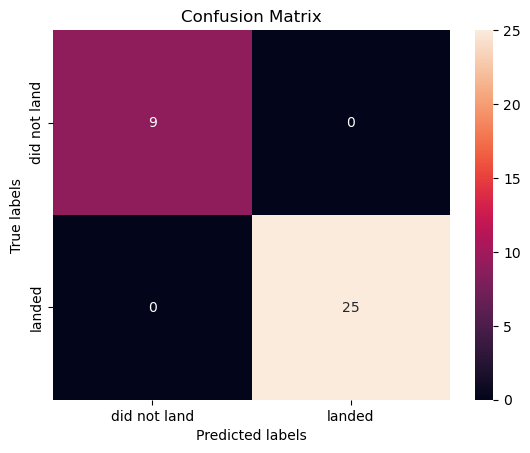

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Overview: (Best Model)

True Postive - 25 (True label is landed, Predicted label is also landed)

False Postive - 0 (True label is not landed, Predicted label is landed)

### Decision Tree Classifier

In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

In [25]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8895604395604396


In [26]:
best_tree = tree_cv.best_estimator_
best_tree.score(X_test, Y_test)

0.9705882352941176

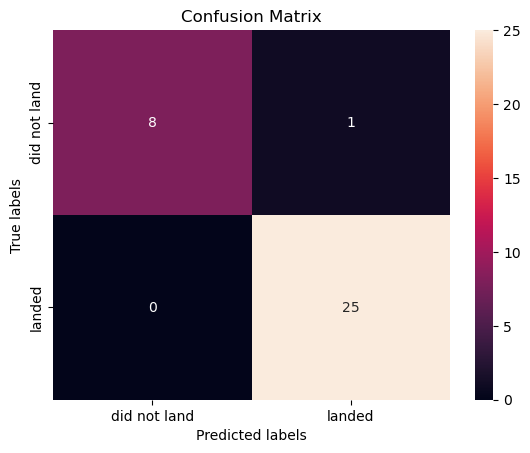

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Overview:

True Postive - 25 (True label is landed, Predicted label is also landed)

False Postive - 1 (True label is not landed, Predicted label is landed)

### K Nearest Neighbour

In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [29]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8895604395604396


In [31]:
best_knn = knn_cv.best_estimator_
best_knn.score(X_test, Y_test)

0.9411764705882353

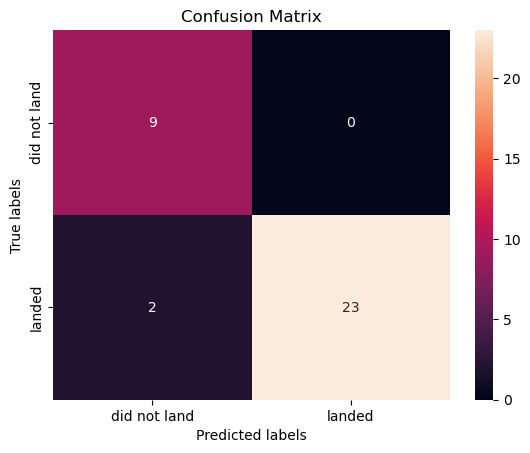

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Overview:

True Postive - 23 (True label is landed, Predicted label is also landed)

False Postive - 1 (True label is not landed, Predicted label is landed)

### Best Performing Model

<Figure size 800x600 with 0 Axes>

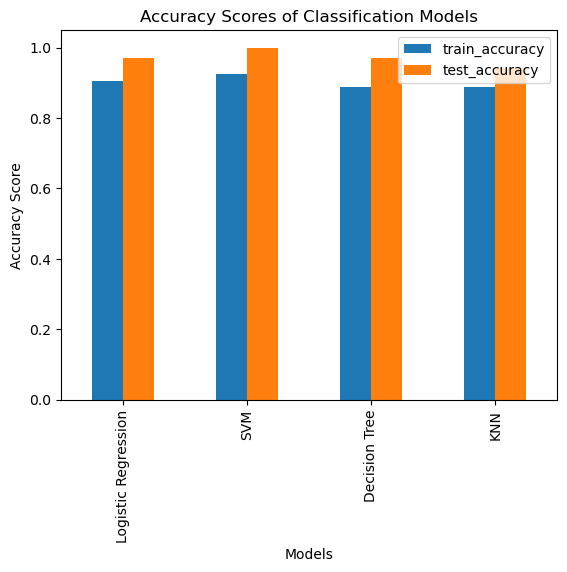

In [38]:
data = {
    'models' : ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'train_accuracy' : [0.904, 0.926, 0.889, 0.889],
    'test_accuracy' : [0.970, 1.0, 0.970, 0.941]
}
accuracy_data = pd.DataFrame(data)
accuracy_data.set_index('models', inplace=True)

# Create a barplot
plt.figure(figsize=(8, 6))
accuracy_data.plot(kind = 'bar')

# Add title and labels
plt.title('Accuracy Scores of Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()